In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.drop(['Purchased'], axis=1).values
y = dataset[['Purchased']].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


c:\Users\Kannan\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics using y_test (flattened) and y_pred
sensitivity = recall_score(y_test, y_pred)   # sensitivity equals recall
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Sensitivity (Recall):", sensitivity)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Sensitivity (Recall): 0.75
Precision: 0.8888888888888888
Accuracy: 0.89
F1 Score: 0.8135593220338984


C:\Users\Kannan\AppData\Local\Temp\ipykernel_36336\47126043.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


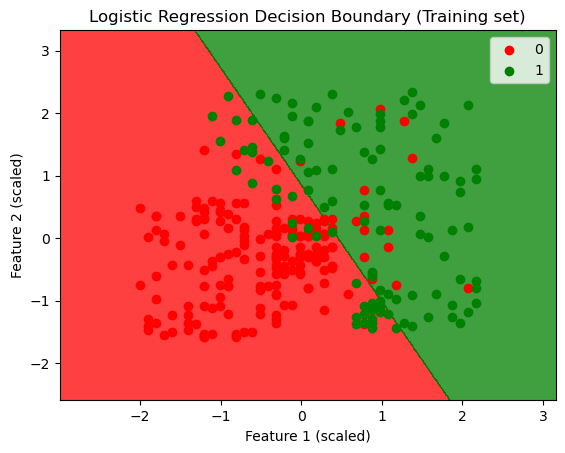

In [21]:
from matplotlib.colors import ListedColormap

# Visualize the decision boundary on the training set
X_set, y_set = X_train, y_train.ravel()
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
)
plt.contourf(
    X1, X2,
    classifier.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )
plt.title('Logistic Regression Decision Boundary (Training set)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

0 0
[-0.80480212 -0.01254409 -0.30964085 -0.80480212 -0.30964085 -1.10189888
 -0.70576986 -1.99318916  0.8787462  -0.80480212 -1.00286662 -0.11157634
  0.08648817 -1.79512465 -0.60673761 -0.11157634 -1.89415691 -0.30964085
 -0.30964085  0.28455268 -1.49802789 -1.00286662 -0.90383437 -0.11157634
 -0.60673761 -1.6960924  -0.11157634 -1.39899564 -1.99318916 -1.59706014
 -0.4086731  -0.70576986 -1.10189888  0.28455268 -1.10189888 -0.30964085
 -1.10189888 -0.11157634 -1.20093113 -0.4086731  -0.30964085 -0.4086731
 -0.90383437 -1.20093113 -1.49802789 -0.60673761 -1.89415691 -1.89415691
 -1.39899564 -1.10189888  0.18552042  0.38358493 -0.30964085 -1.59706014
 -1.10189888 -1.99318916  0.38358493  0.18552042  2.06713324 -1.39899564
 -1.20093113  0.18552042  0.28455268  0.38358493 -1.49802789 -1.29996338
 -1.39899564 -1.49802789] [ 0.50496393 -0.5677824   0.1570462   0.27301877 -0.5677824  -1.43757673
 -1.58254245 -0.04590581 -0.77073441 -0.59677555 -0.42281668 -0.42281668
  0.21503249  0.475970

C:\Users\Kannan\AppData\Local\Temp\ipykernel_36336\2264964242.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


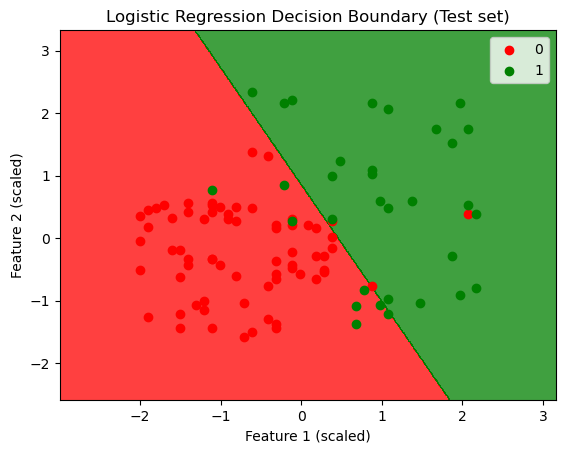

In [ ]:
from matplotlib.colors import ListedColormap

colors = ['red', 'green']
X_set, y_set = X_test, y_test.ravel()
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
)
plt.contourf(
    X1, X2,
    classifier.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(colors)
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(colors)(i), label=j
    )
plt.title('Logistic Regression Decision Boundary (Test set)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()